In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as LinearRegression
import numpy as np



In [4]:
df = pd.read_csv(r"https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
x=df['horsepower']
y=df['mpg']

In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df=df.dropna()

In [11]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [12]:
df['mpg'].fillna(df['mpg'].median(), inplace=True)

C:\Users\AB\AppData\Local\Temp\ipykernel_9312\1440512226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mpg'].fillna(df['mpg'].median(), inplace=True)


In [13]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

C:\Users\AB\AppData\Local\Temp\ipykernel_9312\2571313987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)


In [14]:
print("missing values:")
print(df[['horsepower', 'mpg']].isnull().sum())

missing values:
horsepower    0
mpg           0
dtype: int64


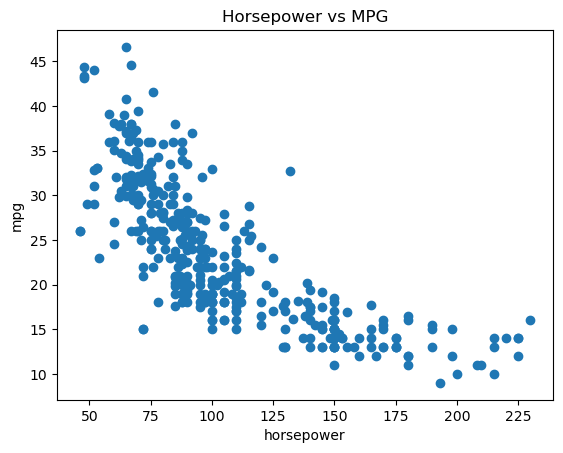

In [15]:
plt.scatter(x,y)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('Horsepower vs MPG')
plt.show()


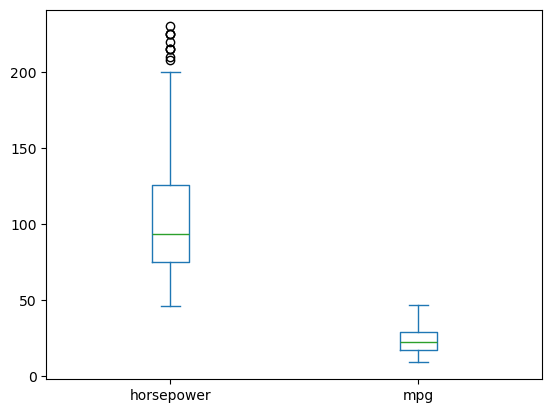

In [16]:
df[['horsepower','mpg']].plot(kind='box')
plt.show()

In [17]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

<Axes: >

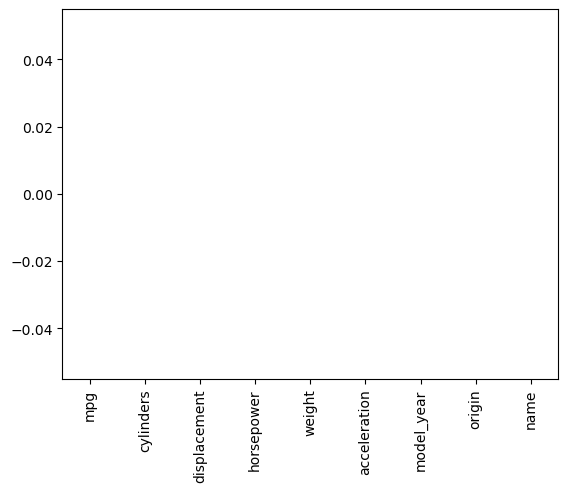

In [21]:
df.isnull().sum().plot(kind='bar')

In [22]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object


In [23]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

C:\Users\AB\AppData\Local\Temp\ipykernel_9312\1800950255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


In [24]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


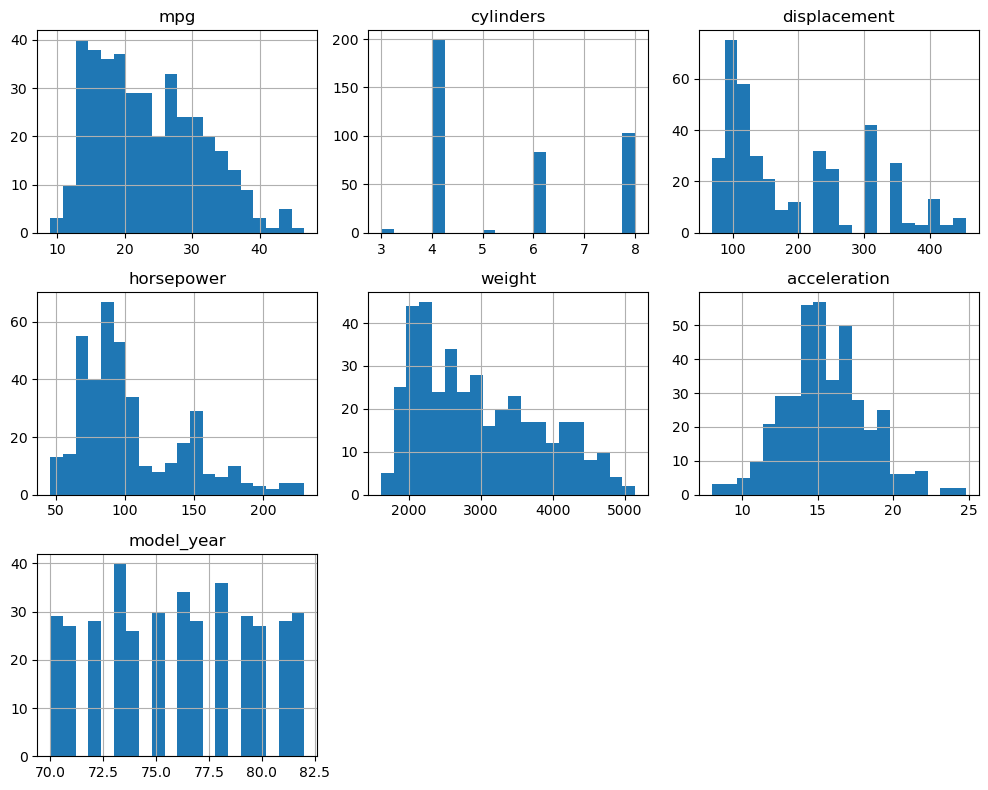

In [25]:
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


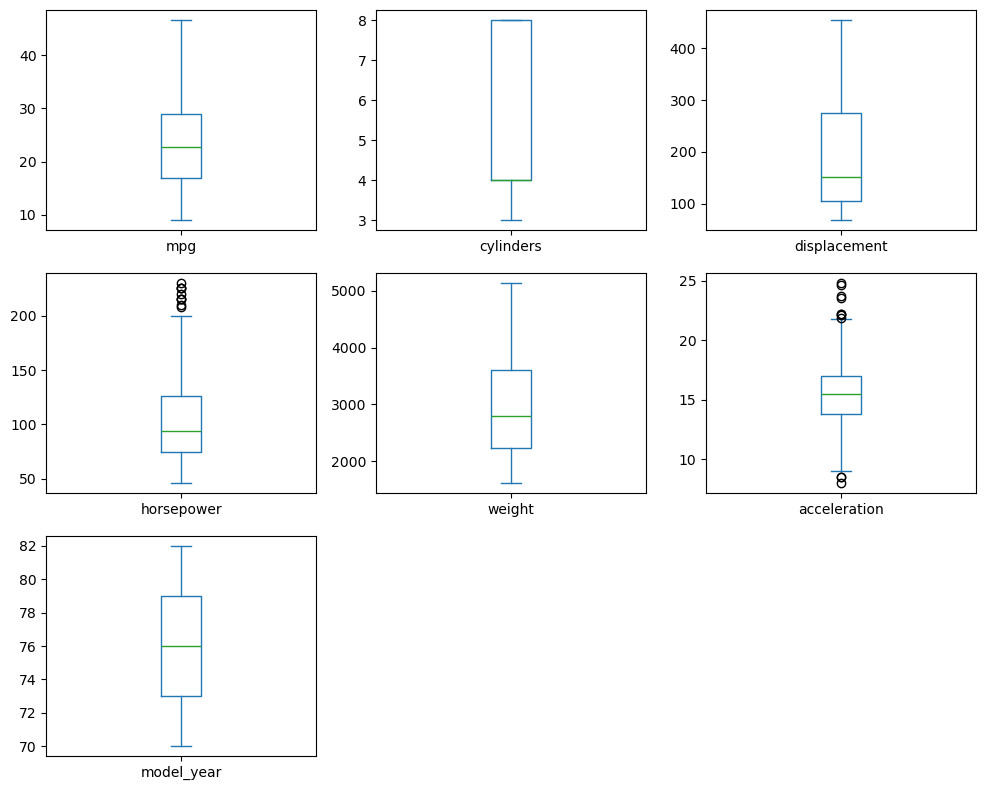

In [26]:
df.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 8))
plt.tight_layout()
plt.show()

In [29]:
model = LinearRegression()
model.fit(X, y)

# predictions
y_pred_sklearn = model.predict(X)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

TypeError: 'module' object is not callable

In [30]:
import numpy as np

def linear_regression_numpy(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    
    # Slope (b)
    b = (n * np.sum(x*y) - np.sum(x)*np.sum(y)) / \
        (n * np.sum(x**2) - (np.sum(x))**2)
    
    # Intercept (a)
    a = (np.sum(y) - b * np.sum(x)) / n
    
    return a, b

# Clean data first
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
data = df[['horsepower', 'mpg']].dropna()

x = data['horsepower'].values
y = data['mpg'].values

a, b = linear_regression_numpy(x, y)
print(f"y = {a:.4f} + {b:.4f}x")

# Predictions
y_pred = a + b * x
print(f"R2 Score: {1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2):.4f}")

y = 39.9359 + -0.1578x
R2 Score: 0.6059
